In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Leitura da imagem, alguns exemplos
img = np.random.randint(0,255,(512,512),dtype=np.uint8) #img 512x512, uint8 aleatorios
#img = cv2.imread('./airfield-05small-auto.tif', cv2.IMREAD_GRAYSCALE) # tif, com perdas
#img = cv2.imread('./lena.png', cv2.IMREAD_GRAYSCALE) # velha lena nunca falha, sem perdas, png

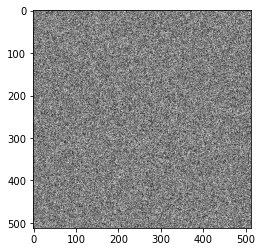

In [3]:
plt.figure(0)
plt.imshow(img, cmap='gray') # especificar color map
#plt.axis('off')

In [4]:
W, H = img.shape
print('Dimensões:',img.shape)
print('Tipo-Dados:',img.dtype)
print('Pixels:',W*H)
print('Tamanho:',W*H/1024)
import sys
print('Tam. Obj.:', sys.getsizeof(img)/1024)

Dimensões: (512, 512)
Tipo-Dados: uint8
Pixels: 262144
Tamanho: 256.0
Tam. Obj.: 256.109375


In [5]:
def computa_histograma(img):
    """Computa um histograma simples - veja em Burger/2016 e slides da aula de 04/08
    Args:
        img: WxH array de inteiros int. Imagem de entrada.
        
    Retorna:
        h: array numpy de 256 inteiros int. Histograma da imagem.
    """

    W, H = img.shape # pega largura e altura da imagem
    h = np.zeros(256, np.uint64) # inicializa h, inteiros maiores
    for v in range(0,H): 
        for u in range(0,W):
            i = img[u,v]
            h[i] = h[i]+1
    
    return h

[1058  999  990 1043 1036 1037 1020 1046 1041  991  969 1067 1062 1019
  947  981 1047 1003 1006  996 1006 1039 1066 1046 1021 1034 1040  963
 1058 1029 1035 1007  959 1019 1040 1032 1024 1016 1036 1012  975 1023
 1020 1129 1025 1023 1018 1003 1009  966 1092  982 1033 1035 1017 1061
 1156  997 1030 1041 1045  955 1032 1041 1023 1027 1057  953 1065 1035
 1064 1034 1041  991 1032 1004 1009 1044 1047 1030 1053 1030 1008  988
 1064 1034 1045 1040 1022 1064 1032 1021 1085 1078  976  992  988 1029
 1036 1030  993 1075  992 1067 1027 1069 1046  989 1020 1029  963 1027
 1033  994  948  985 1051 1036 1010 1010 1039  988 1047 1029 1024 1037
 1050  983 1016  988 1049 1030 1020 1029 1001  979  991 1056 1055 1011
 1031 1046 1034 1040 1020 1022 1049 1054 1035  955 1071 1052  998 1076
 1020 1072 1026 1045  986 1032  991 1008 1049 1016 1066 1030 1019 1117
 1035 1032 1063 1036 1008  981  981 1038 1047 1097 1022 1031  989 1041
  977 1069 1019 1050 1050 1057 1053 1027  967 1022 1098 1070  983 1089
  992 

<BarContainer object of 256 artists>

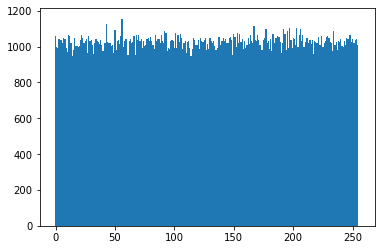

In [6]:
# Histograma implementado
hist_computado=computa_histograma(img)
print(hist_computado)
#plt.bar(range(0, 256), hist_computado) # há distancia entre as barras, usar outros parametros e tirar bordas/distância
plt.bar(range(0, 256), hist_computado, linewidth=0, width=1) # testes, facecolor='black', edgecolor='black')

In [7]:
def computa_histograma2(img):
    """Computa um histograma simples - veja em Burger/2016 e slides da aula de 04/08
    
    Args:
        img: WxH array de inteiros int. Imagem de entrada.
        
    Retorna:
        h: array numpy de 256 inteiros int. Histograma da imagem.
    """

    W, H = img.shape

    h = np.zeros((256), np.uint64)
    for v in range(0,H):
        for u in range(0,W):
            h[img[u,v]] += 1
    
    return h

[1058  999  990 1043 1036 1037 1020 1046 1041  991  969 1067 1062 1019
  947  981 1047 1003 1006  996 1006 1039 1066 1046 1021 1034 1040  963
 1058 1029 1035 1007  959 1019 1040 1032 1024 1016 1036 1012  975 1023
 1020 1129 1025 1023 1018 1003 1009  966 1092  982 1033 1035 1017 1061
 1156  997 1030 1041 1045  955 1032 1041 1023 1027 1057  953 1065 1035
 1064 1034 1041  991 1032 1004 1009 1044 1047 1030 1053 1030 1008  988
 1064 1034 1045 1040 1022 1064 1032 1021 1085 1078  976  992  988 1029
 1036 1030  993 1075  992 1067 1027 1069 1046  989 1020 1029  963 1027
 1033  994  948  985 1051 1036 1010 1010 1039  988 1047 1029 1024 1037
 1050  983 1016  988 1049 1030 1020 1029 1001  979  991 1056 1055 1011
 1031 1046 1034 1040 1020 1022 1049 1054 1035  955 1071 1052  998 1076
 1020 1072 1026 1045  986 1032  991 1008 1049 1016 1066 1030 1019 1117
 1035 1032 1063 1036 1008  981  981 1038 1047 1097 1022 1031  989 1041
  977 1069 1019 1050 1050 1057 1053 1027  967 1022 1098 1070  983 1089
  992 

<BarContainer object of 256 artists>

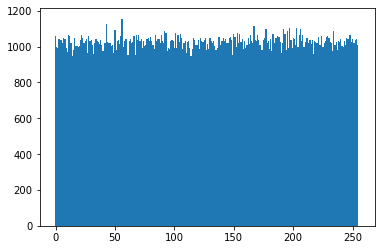

In [8]:
# Histograma implementado 2
hist_computado2=computa_histograma2(img)
print(hist_computado2)
#plt.bar(range(0, 256), hist_computado) # há distancia entre as barras, usar outros parametros e tirar bordas/distância
plt.bar(range(0, 256), hist_computado, linewidth=0, width=1) # testes, facecolor='black', edgecolor='black')